In [37]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [38]:
#Hyperparameters
num_input = 500
num_output = 100

In [39]:
# Define "NN"
x = torch.randn(1,1,1,num_input)
l1 = nn.Linear(num_input, num_output)
b1 = nn.BatchNorm2d(1)
print(x.shape, l1, b1, sep='\n')

torch.Size([1, 1, 1, 500])
Linear(in_features=500, out_features=100, bias=True)
BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [40]:
# First run through the "NN"
xl1 = l1(x)
xb1 = b1(xl1)

In [41]:
# Compute a arbitrary loss and update "NN"
(torch.ones(1,1,1,num_output) - xb1).sum().backward()

for param in l1.parameters():
    param.data = param.data - (param.grad * 500000)

In [42]:
# First run through the "NN"
xl2 = l1(x)
xb2 = b1(xl2)

The linear outputs change drastically after the (extreme) gradient update but the batch norm layers retain their normal shape

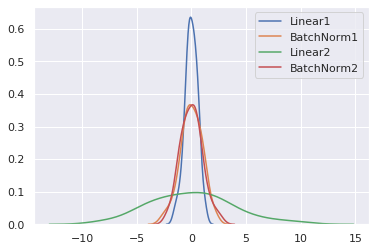

In [45]:
# Different output distributions
sns.kdeplot(xl1[0][0][0].detach().numpy(), label='Linear1')
sns.kdeplot(xb1[0][0][0].detach().numpy(), label='BatchNorm1')
sns.kdeplot(xl2[0][0][0].detach().numpy(), label='Linear2')
sns.kdeplot(xb2[0][0][0].detach().numpy(), label='BatchNorm2')

The same output node changes its location within the distribution even though the distribution as a whole remains constant

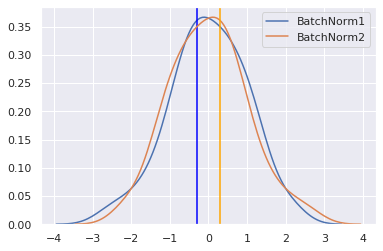

In [44]:
# Batch Norm Layers over time
sns.kdeplot(xb1[0][0][0].detach().numpy(), label='BatchNorm1')
plt.axvline(xb1[0][0][0][0].item(), color='blue')
sns.kdeplot(xb2[0][0][0].detach().numpy(), label='BatchNorm2')
plt.axvline(xb2[0][0][0][0].item(), color='orange')